In [4]:
import stumpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from library.StockPriceDataFrame import StockPriceDataFrame

In [5]:
pd.options.display.float_format = "{:,.3f}".format
np.set_printoptions(suppress=True)

In [6]:
connection = sqlite3.connect('./data/GBPUSD.db')
df = pd.read_sql_query("SELECT * FROM d_2010", connection, parse_dates=True)

In [7]:
df.head()

,pTime,pOpen,pHigh,pLow,pClose,vcOpen,vcHigh,vcLow,vcClose
0,1262304000,1.618,1.618,1.616,1.617,3.016,3.016,-0.827,1.520
1,1262305800,1.617,1.617,1.617,1.617,1.408,1.517,1.051,1.325
2,1262307600,1.617,1.617,1.617,1.617,1.047,1.261,0.743,0.895
3,1262309400,1.617,1.617,1.617,1.617,1.215,1.580,0.922,1.398
4,1262311200,1.617,1.617,1.617,1.617,1.241,1.935,0.937,1.501


In [8]:
data = df[['pTime', 'pOpen', 'pHigh', 'pLow', 'pClose']]

In [9]:
index = data['pTime']
data = data.drop('pTime', axis=1)
data.index = index

In [10]:
data.head()

,pOpen,pHigh,pLow,pClose
pTime,,,,
1262304000,1.618,1.618,1.616,1.617
1262305800,1.617,1.617,1.617,1.617
1262307600,1.617,1.617,1.617,1.617
1262309400,1.617,1.617,1.617,1.617
1262311200,1.617,1.617,1.617,1.617


In [11]:
timeseries = data.mean(axis=1)

In [12]:
timeseries.head()

pTime
1262304000   1.617
1262305800   1.617
1262307600   1.617
1262309400   1.617
1262311200   1.617
dtype: float64

In [13]:
timeseries_1k = timeseries[:1000]

In [14]:
timeseries_1k

pTime
1262304000   1.617
1262305800   1.617
1262307600   1.617
1262309400   1.617
1262311200   1.617
              ... 
1264786200   1.605
1264788000   1.602
1264789800   1.602
1264791600   1.601
1264793400   1.601
Length: 1000, dtype: float64

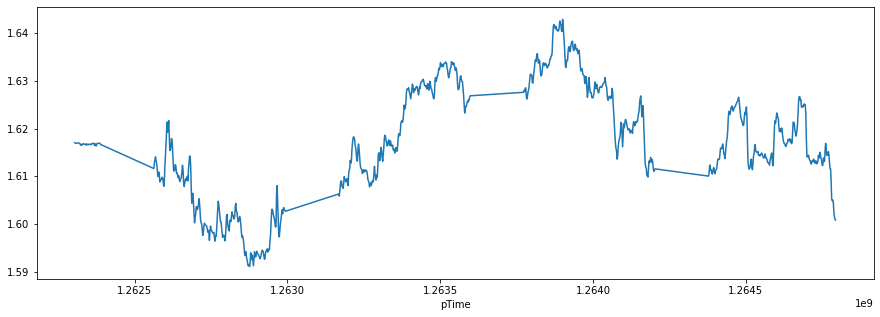

In [15]:
plt.figure(figsize=(15, 5))
sns.lineplot(y=timeseries_1k.values, x=timeseries_1k.index);

# STUMPY WITH SIMPLE ONE-DIMENTION TIME SERIES

In [16]:
m = 30
mp = stumpy.stump(timeseries, m)

In [17]:
mp[:5]

array([[2.8002164371126668, 2616, -1, 2616],
       [2.9452273573348298, 2617, -1, 2617],
       [3.1129152506298468, 2618, -1, 2618],
       [3.4405599088778844, 10137, -1, 10137],
       [3.320032231291398, 10138, -1, 10138]], dtype=object)

In [18]:
timeseries.shape

(12522,)

In [19]:
len(mp)

12493

In [20]:
motif_index = np.argsort(mp[:, 0])[30]

In [21]:
motif_index

10337

In [22]:
nearest_neighbor_idx = mp[motif_index, 1]

In [23]:
nearest_neighbor_idx

2980

In [24]:
normalizer = Normalizer()
normalizer.fit([timeseries])
norm_timeseries = pd.Series(data=normalizer.transform([timeseries])[0] * 2, index=timeseries.index)

In [25]:
norm_timeseries.head()

pTime
1262304000   0.019
1262305800   0.019
1262307600   0.019
1262309400   0.019
1262311200   0.019
dtype: float64

In [26]:
pattern_1 = norm_timeseries[nearest_neighbor_idx:].head(30)

In [27]:
pattern_1.head()

pTime
1269921600   0.017
1269923400   0.017
1269925200   0.017
1269927000   0.017
1269928800   0.017
dtype: float64

In [28]:
pattern_2 = norm_timeseries[motif_index:].head(30)

In [29]:
pattern_2.index = pattern_1.index

In [30]:
pattern_2.head()

pTime
1269921600   0.018
1269923400   0.018
1269925200   0.018
1269927000   0.018
1269928800   0.018
dtype: float64

<AxesSubplot:xlabel='pTime'>

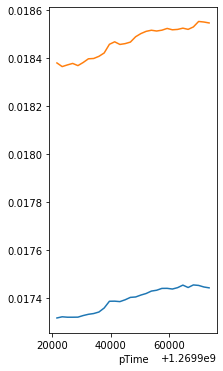

In [31]:
plt.figure(figsize=(3, 6))
sns.lineplot(data=pattern_1)
sns.lineplot(data=pattern_2)

In [32]:
print(np.std(pattern_1))

4.9696564326463455e-05


In [33]:
def get_derivatives(data):
    return (np.diff(data.values) / np.diff(data.index))

<AxesSubplot:xlabel='pTime'>

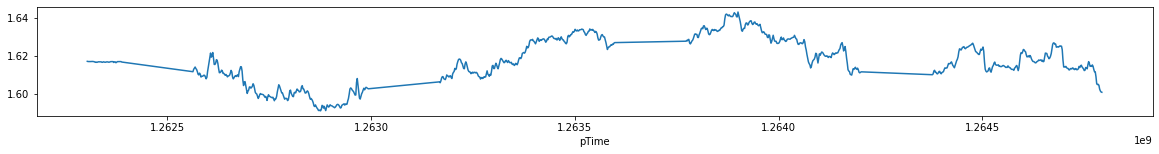

In [34]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=timeseries[:1000])

In [35]:
derivatives = normalize([get_derivatives(timeseries)])

In [36]:
derivatives = pd.Series(data=derivatives[0], index=timeseries.index[:-1])

In [37]:
norm_timeseries

pTime
1262304000   0.019
1262305800   0.019
1262307600   0.019
1262309400   0.019
1262311200   0.019
              ... 
1293831000   0.018
1293832800   0.018
1293834600   0.018
1293836400   0.018
1293838200   0.018
Length: 12522, dtype: float64

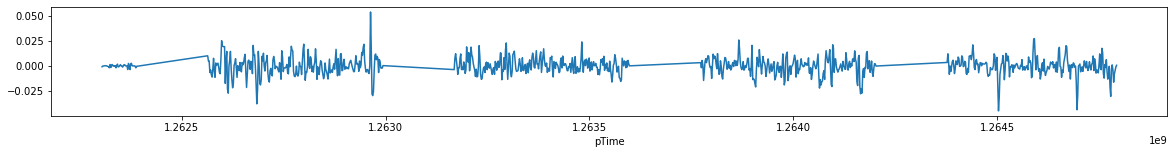

<AxesSubplot:xlabel='pTime'>

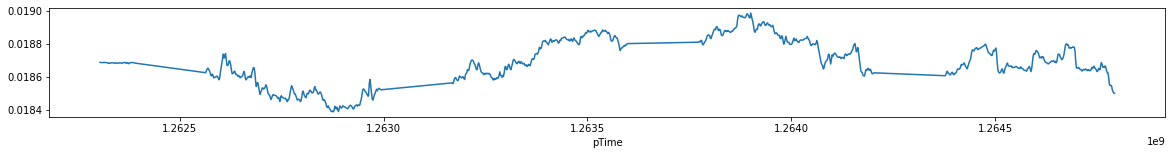

In [38]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=derivatives[:1000])
plt.show()
plt.figure(figsize=(20, 2))
sns.lineplot(data=norm_timeseries[:1000])

In [39]:
normalize([timeseries])

array([[0.00934379, 0.00934321, 0.00934309, ..., 0.0090152 , 0.00901727,
        0.00902061]])

In [40]:
def merge_patterns(first_pattern, second_pattern):
    return (first_pattern + second_pattern) / 2


1


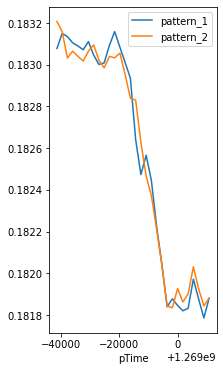

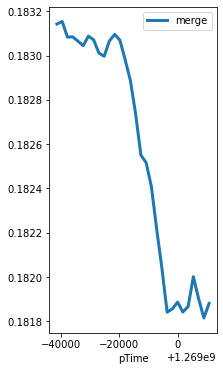

2


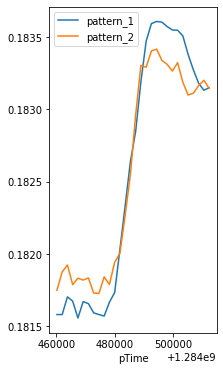

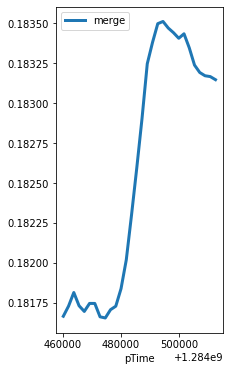

3


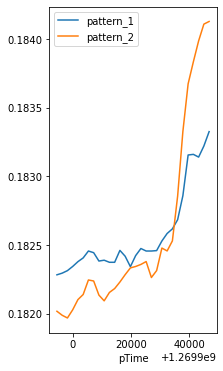

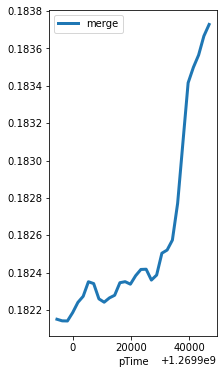

4


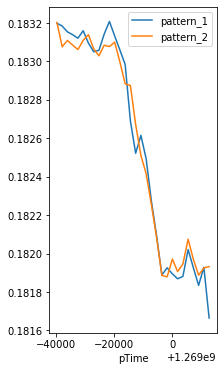

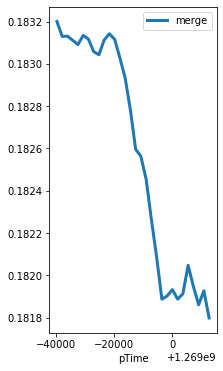

5


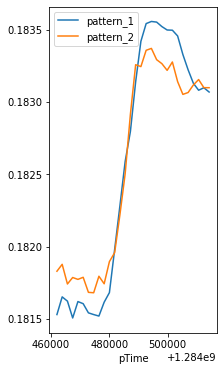

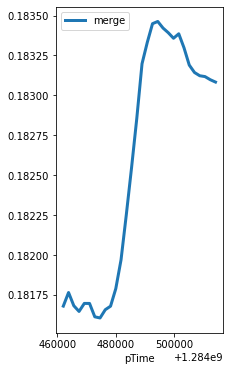

6


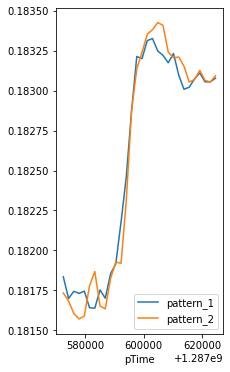

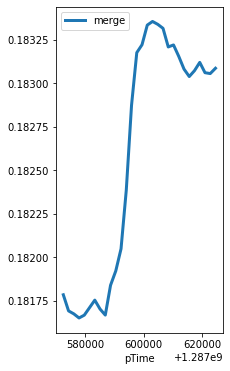

7


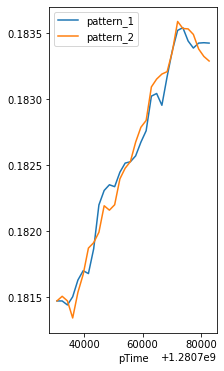

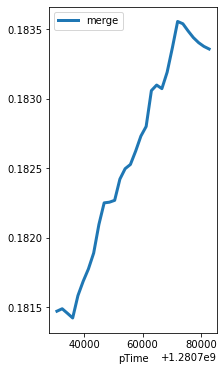

8


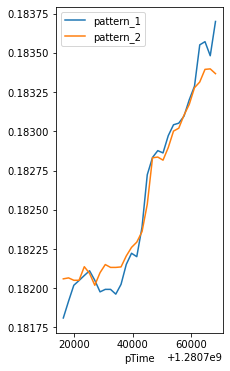

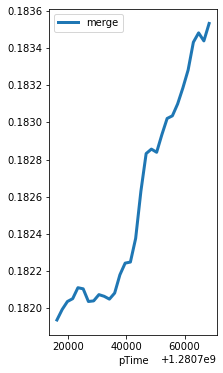

9


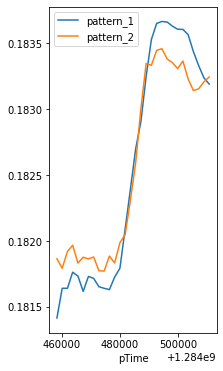

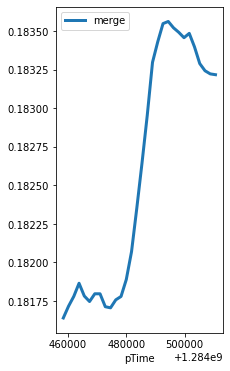

10


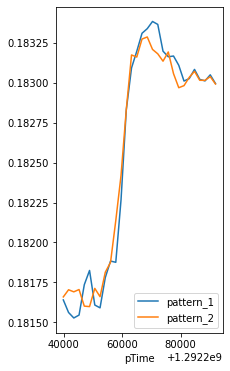

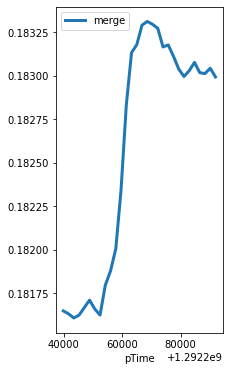

11


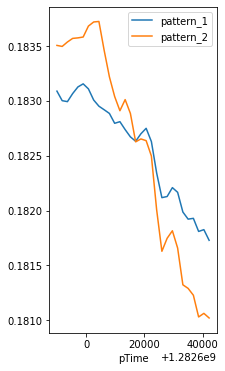

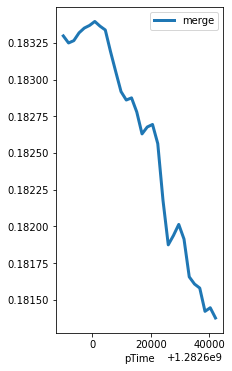

12


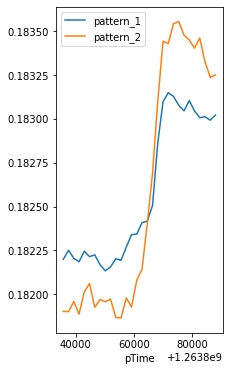

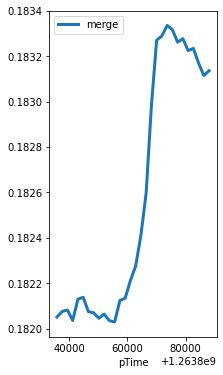

13


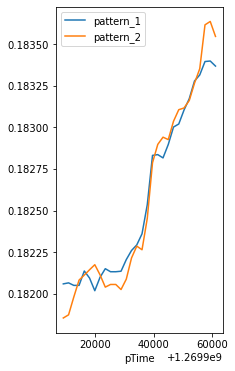

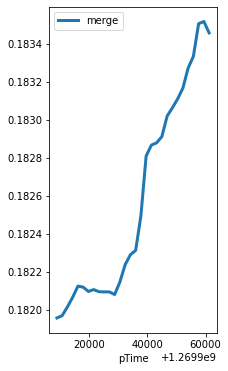

14


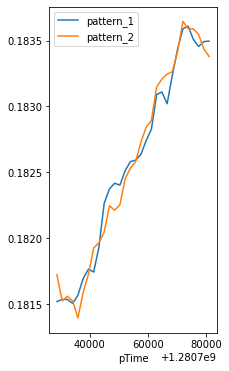

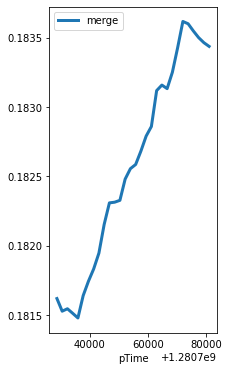

15


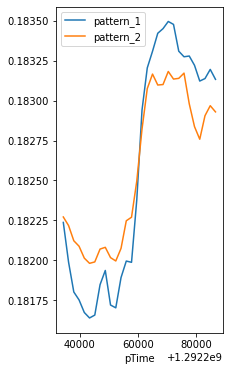

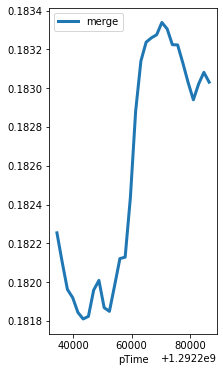

16


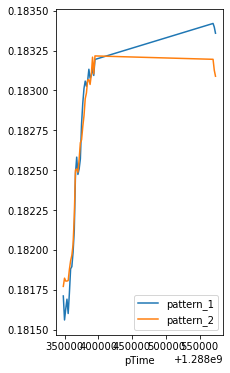

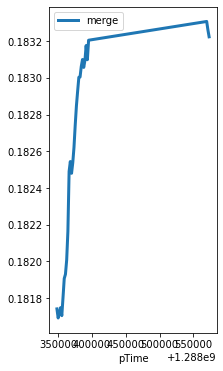

17


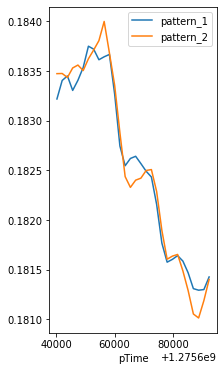

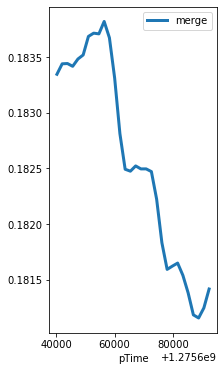

18


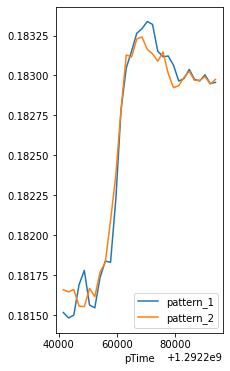

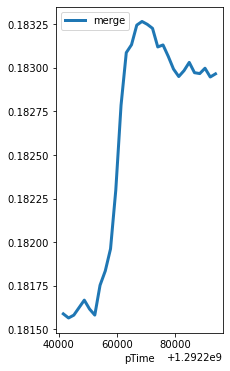

19


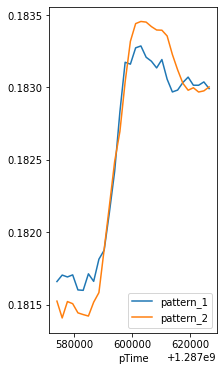

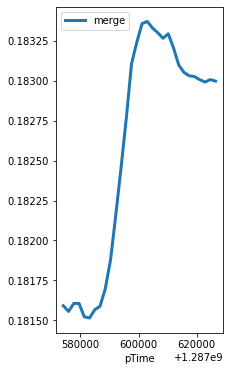

20


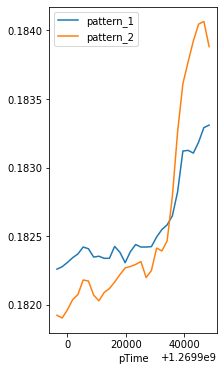

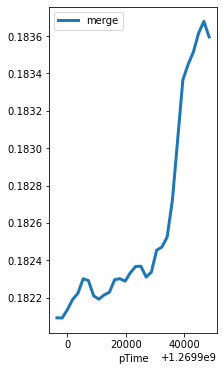

In [63]:
m = 30
mp = stumpy.stump(timeseries, m)

standard_deviations = []

count = 0
for pattern_index in range(1, 40, 2):
    motif_index = np.argsort(mp[:, 0])[pattern_index]

    nearest_neighbor_idx = mp[motif_index, 1]

    index = timeseries[nearest_neighbor_idx:].head(m).index

    pattern_1 = timeseries[nearest_neighbor_idx:].head(m)
    pattern_2 = timeseries[motif_index:].head(m)

    # standard_deviations.append(pattern_1.std())
    # standard_deviations.append(pattern_2.std())
    
    # if pattern_1.std() > upper_bound and pattern_2.std() > upper_bound:
    count += 1
    print(count)

    pattern_1 = pd.Series(data=normalize([pattern_1])[0], index=index)
    pattern_2 = pd.Series(data=normalize([pattern_2])[0], index=index)

    # interval_1 = pattern_1.max() - pattern_1.min()
    # interval_2 = pattern_2.max() - pattern_2.min()
    # print(pattern_1.std())
    # print(pattern_2.std())

    avg_pattern = merge_patterns(pattern_1, pattern_2)
    avg_pattern = avg_pattern.rolling(window=1).mean()
    

    plt.figure(figsize=(3, 6))

    sns.lineplot(data=pattern_1, label='pattern_1')
    sns.lineplot(data=pattern_2, label='pattern_2')
    plt.show()

    plt.figure(figsize=(3, 6))
    sns.lineplot(data=avg_pattern, linewidth=3, label='merge')
    plt.show()

D:\Denis\miniconda\envs\neural-networks\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


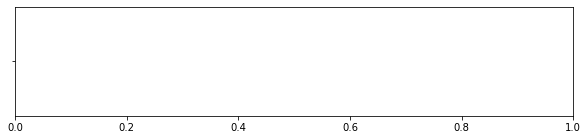

In [42]:
plt.figure(figsize=(10, 2))
sns.boxplot(standard_deviations);

In [43]:
Q3 = np.percentile(standard_deviations, 0.75)
Q1 = np.percentile(standard_deviations, 0.25)

IndexError: cannot do a non-empty take from an empty axes.

In [ ]:
IQR = Q3 - Q1
upper_bound = Q3 + IQR * 1.5

In [ ]:
standard_deviations = pd.Series(standard_deviations)

In [ ]:
standard_deviations[standard_deviations > upper_bound]

0      0.004
1      0.007
2      0.004
3      0.007
4      0.006
        ... 
1195   0.005
1196   0.004
1197   0.002
1198   0.004
1199   0.003
Length: 1153, dtype: float64

In [ ]:
merged_ts = merge_patterns(pattern_1, pattern_2)

<AxesSubplot:xlabel='pTime'>

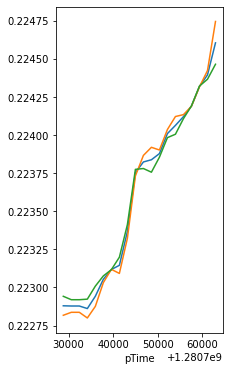

In [ ]:
plt.figure(figsize=(3, 6))
sns.lineplot(data=merged_ts)
sns.lineplot(data=pattern_1)
sns.lineplot(data=pattern_2)

# STUMPY WITH MILTI-DIMENSIONAL TIME SERIES

In [45]:
connection = sqlite3.connect('./data/GBPUSD.db')
df = pd.read_sql_query("SELECT * FROM d_2010", connection, parse_dates=True)

In [46]:
df.head()

,pTime,pOpen,pHigh,pLow,pClose,vcOpen,vcHigh,vcLow,vcClose
0,1262304000,1.618,1.618,1.616,1.617,3.016,3.016,-0.827,1.520
1,1262305800,1.617,1.617,1.617,1.617,1.408,1.517,1.051,1.325
2,1262307600,1.617,1.617,1.617,1.617,1.047,1.261,0.743,0.895
3,1262309400,1.617,1.617,1.617,1.617,1.215,1.580,0.922,1.398
4,1262311200,1.617,1.617,1.617,1.617,1.241,1.935,0.937,1.501


In [47]:
m_timeseries = StockPriceDataFrame(df[['pTime', 'pOpen', 'pHigh', 'pLow', 'pClose']]).get_content()

In [48]:
m_timeseries.shape

(12522, 4)

In [49]:
m_timeseries.head()

,Open,High,Low,Close
Date,,,,
2010-01-01 00:00:00,1.618,1.618,1.616,1.617
2010-01-01 00:30:00,1.617,1.617,1.617,1.617
2010-01-01 01:00:00,1.617,1.617,1.617,1.617
2010-01-01 01:30:00,1.617,1.617,1.617,1.617
2010-01-01 02:00:00,1.617,1.617,1.617,1.617


In [50]:
multidimensional_motifs = stumpy.mstump(m_timeseries, m=20)

In [51]:
print(multidimensional_motifs[0].shape)
multidimensional_motifs[0]

(4, 12503)


array([[1.8765499 , 1.04490032, 1.02845643, ..., 1.1877888 , 1.25423572,
        1.18982921],
       [2.5264718 , 2.5440362 , 2.59211879, ..., 1.41868397, 1.52216164,
        1.51043076],
       [3.19681516, 3.06727673, 3.1925328 , ..., 1.49994501, 1.58075064,
        1.60285949],
       [3.54442396, 3.38231387, 3.49650737, ..., 1.56720419, 1.67523785,
        1.66661966]])

In [52]:
print(multidimensional_motifs[1].shape)
multidimensional_motifs[1]

(4, 12503)


array([[8769, 5386, 3636, ..., 4441, 2370, 2371],
       [1185, 5386, 5387, ..., 4441, 2370, 2938],
       [1185, 5386, 5387, ..., 4441, 2937, 2938],
       [7576, 5386, 5387, ..., 4441, 2937, 2938]], dtype=int64)

In [53]:
np.sort(multidimensional_motifs[0])[0][:20]

array([0.41172607, 0.41172607, 0.50655948, 0.50655948, 0.54497312,
       0.54497313, 0.56792297, 0.56792297, 0.56971384, 0.56971384,
       0.57832419, 0.57832419, 0.57859274, 0.57859274, 0.58214105,
       0.58214105, 0.58490243, 0.58490244, 0.58689298, 0.58689298])

In [54]:
motifs_idx = np.argsort(multidimensional_motifs[0], axis=1)

In [55]:
motifs_idx[1]

array([11824,  3364,  3363, ...,    10,    12,     9], dtype=int64)

In [56]:
multidimensional_motifs

(array([[1.8765499 , 1.04490032, 1.02845643, ..., 1.1877888 , 1.25423572,
         1.18982921],
        [2.5264718 , 2.5440362 , 2.59211879, ..., 1.41868397, 1.52216164,
         1.51043076],
        [3.19681516, 3.06727673, 3.1925328 , ..., 1.49994501, 1.58075064,
         1.60285949],
        [3.54442396, 3.38231387, 3.49650737, ..., 1.56720419, 1.67523785,
         1.66661966]]),
 array([[8769, 5386, 3636, ..., 4441, 2370, 2371],
        [1185, 5386, 5387, ..., 4441, 2370, 2938],
        [1185, 5386, 5387, ..., 4441, 2937, 2938],
        [7576, 5386, 5387, ..., 4441, 2937, 2938]], dtype=int64))